In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

pd.set_option('display.max_columns', None)

# Images Metadata

Metadata information downloaded from https://www.cancerimagingarchive.net/collection/lidc-idri/ "Images" "Metadata".

In [2]:
path = '/Volumes/MIREIA/M-THESIS/DATA/TCIA_LIDC-IDRI_20200921-nbia-digest.xlsx'
df = pd.read_excel(path)
df.head()

,Patient ID,Patient Name,Patient Birth Date,Patient Sex,Ethnic Group,Phantom,Species Code,Species Description,Study Instance UID,Study Date,Study Description,Admitting Diagnosis Description,Study ID,Patient Age,Longitudinal Temporal Event Type,Longitudinal Temporal Offset From Event,Series Instance UID,Project,Modality,Protocol Name,Series Date,Series Description,Body Part Examined,Series Number,Annotations Flag,Manufacturer,Manufacturer Model Name,Software Versions,Image Count,Max Submission Timestamp,License Name,License URI,Collection URI,File Size,Date Released,Third Party Analysis
0,LIDC-IDRI-0001,NaN,NaN,NaN,NaN,NO,337915000,Homo sapiens,1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118...,2000-01-01 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818...,LIDC-IDRI,DX,NaN,2000-01-01 00:00:00.0,NaN,CHEST,3000923.0,1.0,GE MEDICAL SYSTEMS,Revolution XQi ADS_28.2,Ads Application Package VERSION ADS_28.2,2,2020-02-21 15:12:42.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,16357620,2020-02-21 15:12:42.0,NaN
1,LIDC-IDRI-0001,NaN,NaN,NaN,NaN,NO,337915000,Homo sapiens,1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...,2000-01-01 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...,LIDC-IDRI,CT,NaN,2000-01-01 00:00:00.0,NaN,CHEST,3000566.0,1.0,GE MEDICAL SYSTEMS,LightSpeed Plus,LightSpeedApps2.4.2_H2.4M5,133,2020-02-21 15:12:49.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,70018838,2020-02-21 15:12:49.0,NaN
2,LIDC-IDRI-0002,NaN,NaN,NaN,NaN,NO,337915000,Homo sapiens,1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...,2000-01-01 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900...,LIDC-IDRI,DX,NaN,2000-01-01 00:00:00.0,NaN,CHEST,3000972.0,1.0,GE MEDICAL SYSTEMS,Revolution XRd ADS_27.5.4,Ads Application Package VERSION ADS_27.5.4,1,2020-02-21 15:12:48.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,6909958,2020-02-21 15:12:48.0,NaN
3,LIDC-IDRI-0002,NaN,NaN,NaN,NaN,NO,337915000,Homo sapiens,1.3.6.1.4.1.14519.5.2.1.6279.6001.490157381160...,2000-01-01 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417...,LIDC-IDRI,CT,NaN,2000-01-01 00:00:00.0,NaN,CHEST,3000522.0,1.0,GE MEDICAL SYSTEMS,LightSpeed16,06MW03.5,261,2020-02-21 15:13:03.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,137396696,2020-02-21 15:13:03.0,NaN
4,LIDC-IDRI-0003,NaN,NaN,NaN,NaN,NO,337915000,Homo sapiens,1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276...,2000-01-01 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,LIDC-IDRI,CT,NaN,2000-01-01 00:00:00.0,NaN,CHEST,3000611.0,1.0,GE MEDICAL SYSTEMS,LightSpeed16,06MW03.5,140,2020-02-21 15:13:11.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,73704090,2020-02-21 15:13:11.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Patient ID                               1308 non-null   object 
 1   Patient Name                             0 non-null      float64
 2   Patient Birth Date                       0 non-null      float64
 3   Patient Sex                              451 non-null    object 
 4   Ethnic Group                             61 non-null     object 
 5   Phantom                                  1308 non-null   object 
 6   Species Code                             1308 non-null   int64  
 7   Species Description                      1308 non-null   object 
 8   Study Instance UID                       1308 non-null   object 
 9   Study Date                               1308 non-null   object 
 10  Study Description                        617 non

## Look at columns of interest

In [4]:
cols_interest = ['Patient ID', 'Patient Sex', 'Ethnic Group', 'Patient Age', 'Modality', 'Image Count']

df_1 = df[cols_interest]
df_1.head()

,Patient ID,Patient Sex,Ethnic Group,Patient Age,Modality,Image Count
0,LIDC-IDRI-0001,NaN,NaN,NaN,DX,2
1,LIDC-IDRI-0001,NaN,NaN,NaN,CT,133
2,LIDC-IDRI-0002,NaN,NaN,NaN,DX,1
3,LIDC-IDRI-0002,NaN,NaN,NaN,CT,261
4,LIDC-IDRI-0003,NaN,NaN,NaN,CT,140


In [5]:
len(df_1)

1308

In [6]:
df_1['Patient ID'].nunique()

1010

In [7]:
df_1['Patient Sex'].value_counts()

Patient Sex
M    228
F    223
Name: count, dtype: int64

In [8]:
df_1['Ethnic Group'].value_counts()

Ethnic Group
white-ns    50
C            9
W            2
Name: count, dtype: int64

In [9]:
df_1['Patient Age'].value_counts()

Patient Age
061Y    18
044Y    15
060Y    14
066Y    13
071Y    12
079Y    11
067Y    11
070Y    11
062Y    11
051Y    10
076Y    10
074Y     9
047Y     9
055Y     9
068Y     9
049Y     8
063Y     8
072Y     8
040Y     7
050Y     7
058Y     6
056Y     6
075Y     6
080Y     6
052Y     6
065Y     6
059Y     6
069Y     5
041Y     5
064Y     5
054Y     5
077Y     4
036Y     4
045Y     4
073Y     4
048Y     3
082Y     3
027Y     3
057Y     3
039Y     3
078Y     3
053Y     3
025Y     2
029Y     2
043Y     2
085Y     2
018Y     2
083Y     2
014Y     2
023Y     2
028Y     2
016Y     2
038Y     1
022Y     1
021Y     1
088Y     1
081Y     1
046Y     1
Name: count, dtype: int64

In [10]:
# transform age to numeric
df_1['age'] = pd.to_numeric(df_1['Patient Age'].str.rstrip('Y'), errors='coerce')
df_1['age'].describe()

/var/folders/b3/cjdnph9s5g171rt5nqc80pyc0000gn/T/ipykernel_78494/2960710349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['age'] = pd.to_numeric(df_1['Patient Age'].str.rstrip('Y'), errors='coerce')


count    335.000000
mean      59.235821
std       14.729738
min       14.000000
25%       50.000000
50%       61.000000
75%       70.000000
max       88.000000
Name: age, dtype: float64

In [11]:
df_1['Modality'].value_counts()

Modality
CT    1018
DX     237
CR      53
Name: count, dtype: int64

In [12]:
df_1['Image Count'].describe()

count    1308.000000
mean      186.947248
std       153.672580
min         1.000000
25%       109.000000
50%       141.000000
75%       262.250000
max       764.000000
Name: Image Count, dtype: float64

## Filter dataset on attributes we want to build subgroups on

In [13]:
# non null for sex and age -> strictly CT data
sub_df_1 = df_1[(df_1['Patient Sex'].isna()==False)&(df_1['age'].isna()==False)&(df_1['Modality']=='CT')]
sub_df_1

,Patient ID,Patient Sex,Ethnic Group,Patient Age,Modality,Image Count,age
130,LIDC-IDRI-0066,F,NaN,061Y,CT,733,61.0
135,LIDC-IDRI-0068,M,NaN,050Y,CT,261,50.0
138,LIDC-IDRI-0071,M,NaN,062Y,CT,261,62.0
141,LIDC-IDRI-0072,M,NaN,066Y,CT,305,66.0
162,LIDC-IDRI-0086,M,NaN,074Y,CT,246,74.0
...,...,...,...,...,...,...,...
1287,LIDC-IDRI-0793,M,NaN,045Y,CT,416,45.0
1295,LIDC-IDRI-0926,F,C,052Y,CT,113,52.0
1303,LIDC-IDRI-0962,M,NaN,039Y,CT,123,39.0
1306,LIDC-IDRI-0993,M,NaN,051Y,CT,126,51.0


### Study distributions

<Axes: xlabel='Patient Sex', ylabel='age'>

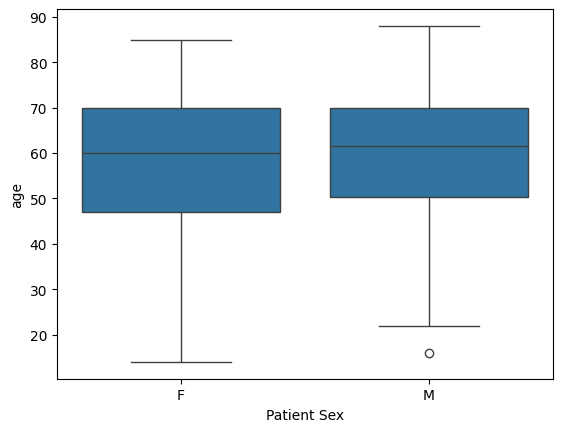

In [14]:
sns.boxplot(x='Patient Sex', y='age', data=sub_df_1)

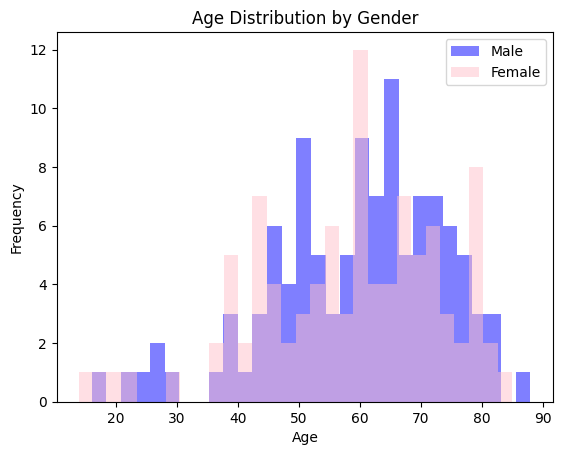

In [15]:
fig, ax = plt.subplots()

sub_df_1[sub_df_1['Patient Sex'] == 'M'].age.plot(kind='hist', ax=ax, alpha=0.5, color='blue', bins=30, label='Male')
sub_df_1[sub_df_1['Patient Sex'] == 'F'].age.plot(kind='hist', ax=ax, alpha=0.5, color='pink', bins=30, label='Female')

ax.set_title('Age Distribution by Gender')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

ax.legend()
plt.show()

In [35]:
bins = [0, 20, 40, 60, 80, float('inf')]  # Adjusting bin edges to include 'over 80'
labels = ['Under 20', '20-40', '40-60', '60-80', 'Over 80']  # Corresponding labels
sub_df_1['age_group'] = pd.cut(sub_df_1['age'], bins=bins, labels=labels, right=False)

sub_df_1[['Patient Sex', 'age_group']].value_counts()

/var/folders/b3/cjdnph9s5g171rt5nqc80pyc0000gn/T/ipykernel_78494/3959398766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_1['age_group'] = pd.cut(sub_df_1['age'], bins=bins, labels=labels, right=False)


Patient Sex  age_group
M            60-80        60
F            60-80        45
             40-60        38
M            40-60        36
             20-40         9
F            Over 80       7
             20-40         5
M            Over 80       4
F            Under 20      2
M            Under 20      1
Name: count, dtype: int64

In [16]:
# number of patients left
sub_df_1['Patient ID'].nunique()

207

In [17]:
sub_df_1['Image Count'].describe()

count    207.000000
mean     164.420290
std       87.860504
min       87.000000
25%      117.500000
50%      133.000000
75%      152.500000
max      764.000000
Name: Image Count, dtype: float64

## Filter dataset includding ethnic group

In [18]:
# non null for sex and age AND ethnicity -> strictly CT data
sub_df_2 = sub_df_1[sub_df_1['Ethnic Group'].isna()==False]
print(sub_df_2['Patient ID'].nunique())
sub_df_2

36


,Patient ID,Patient Sex,Ethnic Group,Patient Age,Modality,Image Count,age
235,LIDC-IDRI-0132,M,white-ns,059Y,CT,127,59.0
264,LIDC-IDRI-0151,F,white-ns,066Y,CT,111,66.0
335,LIDC-IDRI-0187,M,W,041Y,CT,143,41.0
574,LIDC-IDRI-0334,M,white-ns,060Y,CT,127,60.0
577,LIDC-IDRI-0337,F,white-ns,070Y,CT,117,70.0
594,LIDC-IDRI-0355,F,white-ns,080Y,CT,119,80.0
599,LIDC-IDRI-0359,F,white-ns,070Y,CT,109,70.0
604,LIDC-IDRI-0365,F,white-ns,050Y,CT,101,50.0
634,LIDC-IDRI-0396,F,white-ns,040Y,CT,112,40.0
671,LIDC-IDRI-0439,M,white-ns,060Y,CT,116,60.0


# Diagnosis Metadata

In [19]:
path = '/Volumes/MIREIA/M-THESIS/DATA/tcia-diagnosis-data-2012-04-20.xls'
df_diagnosis = pd.read_excel(path)
df_diagnosis.head()

,TCIA Patient ID,"Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n",Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response,Primary tumor site for metastatic disease,"Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 1\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 2\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 2\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 3\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 3\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 4\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 4\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 5\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 5\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n
0,LIDC-IDRI-0068,3,4,Head & Neck Cancer,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LIDC-IDRI-0071,3,1,Head & Neck,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LIDC-IDRI-0072,2,4,Lung Cancer,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIDC-IDRI-0088,3,0,Uterine Cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIDC-IDRI-0090,2,3,NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# number of patients we have diagnosis for
df_diagnosis['TCIA Patient ID'].nunique()

157

## Filter diagnosed patients with patients w/ metadata

In [21]:
# patients that have age and gender present in the data
selected_patients = sub_df_1['Patient ID'].unique()

# keep patients in the previous list
sub_df_diagnosis = df_diagnosis[df_diagnosis['TCIA Patient ID'].isin(selected_patients)]

# total patients with diagnosis and metadata
print(len(sub_df_diagnosis))

#patient diagnosis distribution
sub_df_diagnosis[df_diagnosis.columns[1]].value_counts()

127


Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n
3    50
1    33
0    26
2    18
Name: count, dtype: int64

In [22]:
# 0 Nan, 1 False, 2-3 True
true = 50+18
false = 33
print(true, false)

68 33


# MERGE: patients with age, gender and diagnosis

In [23]:
new_df = pd.merge(sub_df_1, sub_df_diagnosis, left_on='Patient ID', right_on='TCIA Patient ID', how='inner')
new_df

,Patient ID,Patient Sex,Ethnic Group,Patient Age,Modality,Image Count,age,TCIA Patient ID,"Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n",Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response,Primary tumor site for metastatic disease,"Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 1\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 2\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 2\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 3\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 3\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 4\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 4\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 5\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 5\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n
0,LIDC-IDRI-0068,M,NaN,050Y,CT,261,50.0,LIDC-IDRI-0068,3,4,Head & Neck Cancer,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LIDC-IDRI-0071,M,NaN,062Y,CT,261,62.0,LIDC-IDRI-0071,3,1,Head & Neck,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LIDC-IDRI-0072,M,NaN,066Y,CT,305,66.0,LIDC-IDRI-0072,2,4,Lung Cancer,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIDC-IDRI-0088,F,NaN,071Y,CT,241,71.0,LIDC-IDRI-0088,3,0,Uterine Cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIDC-IDRI-0090,M,NaN,049Y,CT,133,49.0,LIDC-IDRI-0090,2,3,NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,LIDC-IDRI-0559,M,NaN,047Y,CT,139,47.0,LIDC-IDRI-0559,1,1,Neuroendocrine cancer,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,LIDC-IDRI-1011,M,NaN,059Y,CT,133,59.0,LIDC-IDRI-1011,3,2,small-cell carcinoma of the tongue,3.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
124,LIDC-IDRI-1010,M,NaN,044Y,CT,252,44.0,LIDC-IDRI-1010,0,0,lymphoma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,LIDC-IDRI-0818,F,NaN,048Y,CT,178,48.0,LIDC-IDRI-0818,0,0,breast cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
new_df['Image Count'].sum()

np.int64(20072)

In [25]:
# create binary diagnosis for patient
col = 'Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n'
new_df['binary_diagnosis_patient'] = np.where(new_df[col] == 0,np.nan, np.where(new_df[col].isin([2, 3]), 1, 0))

## Diagnosis distribution

### Patient level

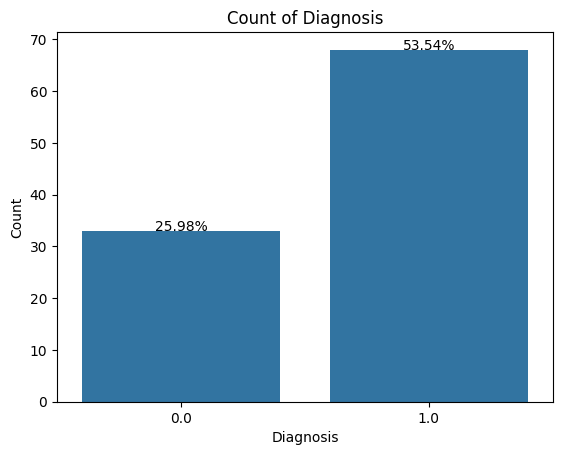

In [26]:
sns.countplot(x='binary_diagnosis_patient', data=new_df)
plt.title('Count of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Calculate the total number of entries to find the percentage
total = float(len(new_df))  # Convert to float for division to get a decimal result
counts = new_df['binary_diagnosis_patient'].value_counts(normalize=True) * 100  # Get percentage counts

# Adding the percentage text on each bar
for p in plt.gca().patches:
    height = p.get_height()  # Get the height of each bar
    plt.text(p.get_x() + p.get_width() / 2., height, '{:1.2f}%'.format(height/total * 100), ha="center")

plt.show()

### Image count level

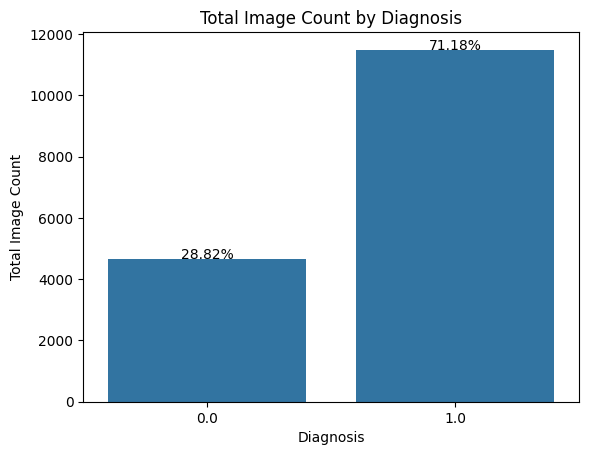

In [27]:
# Sum 'Image Count' grouped by 'binary_diagnosis_patient'
image_counts = new_df.groupby('binary_diagnosis_patient')['Image Count'].sum().reset_index()

# Calculate the total sum of images for calculating percentages
total_images = image_counts['Image Count'].sum()

# Calculate percentages for each category
image_counts['Percentage'] = (image_counts['Image Count'] / total_images) * 100

# Now plot using Seaborn
sns.barplot(x='binary_diagnosis_patient', y='Image Count', data=image_counts)

# Adding the percentage text on each bar
for index, row in image_counts.iterrows():
    plt.text(x=row.name, y=row['Image Count'], s=f"{row['Percentage']:.2f}%", 
             color='black', ha="center")

plt.title('Total Image Count by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Total Image Count')
plt.show()

## Diagnosis by gender plot

### Patient level

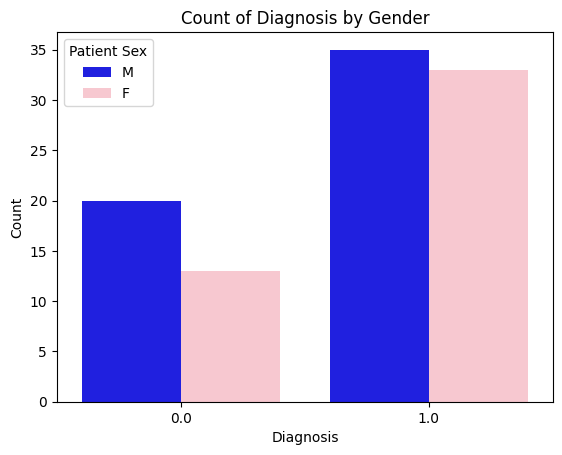

In [28]:
# Define custom colors
color_palette = {"M": "blue", "F": "pink"}

# Plotting
sns.countplot(x='binary_diagnosis_patient', hue='Patient Sex', data=new_df, palette=color_palette)
plt.title('Count of Diagnosis by Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='Patient Sex')
plt.show()


### Image count level

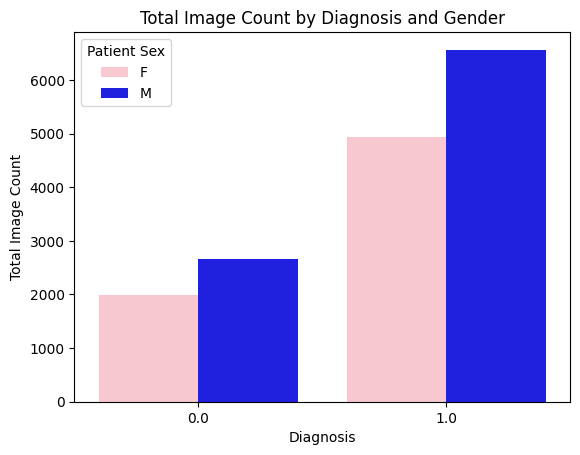

In [29]:
# Aggregate the data
image_counts = new_df.groupby(['binary_diagnosis_patient', 'Patient Sex'])['Image Count'].sum().reset_index()

# Plot
sns.barplot(x='binary_diagnosis_patient', y='Image Count', hue='Patient Sex', data=image_counts, palette=color_palette)
plt.title('Total Image Count by Diagnosis and Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Total Image Count')
plt.legend(title='Patient Sex')
plt.show()


## Age distribution by diagnosis plot

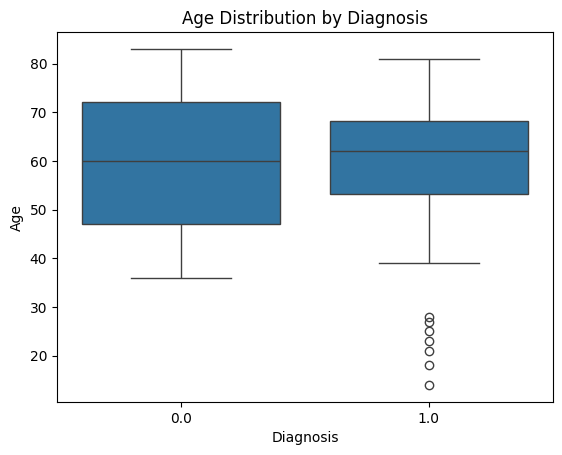

In [30]:
sns.boxplot(x='binary_diagnosis_patient', y='age', data=new_df)
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()

## Create bins for age and categories

In [31]:
# Assuming 'age' is the column in your DataFrame df that contains age data
bins = [0, 20, 40, 60, 80, float('inf')]  # Adjusting bin edges to include 'over 80'
labels = ['Under 20', '20-40', '40-60', '60-80', 'Over 80']  # Corresponding labels
new_df['age_group'] = pd.cut(new_df['age'], bins=bins, labels=labels, right=False)
new_df['age_group'].value_counts()

age_group
60-80       72
40-60       40
20-40        8
Over 80      4
Under 20     3
Name: count, dtype: int64

<Axes: >

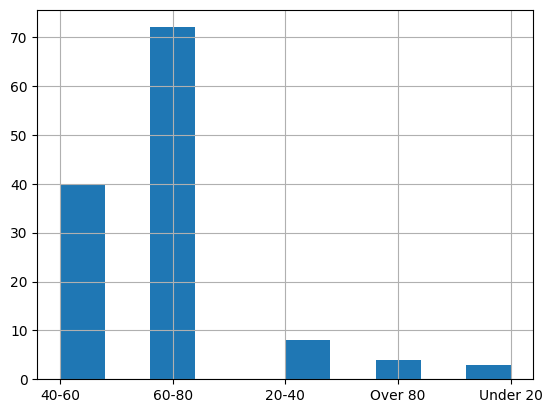

In [34]:
new_df['age_group'].hist()

### Distribution across age groups by gender plot

### Patient level

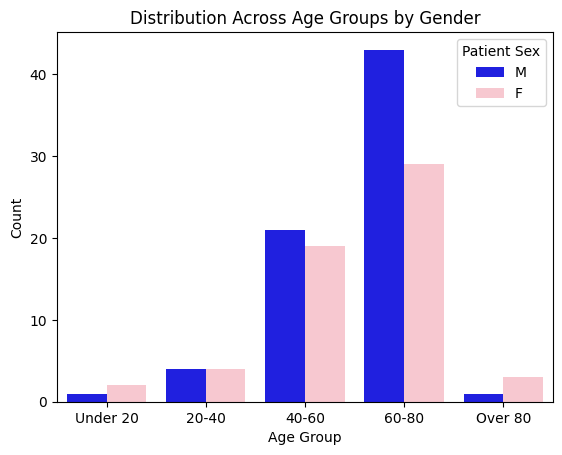

In [32]:
sns.countplot(x='age_group', hue='Patient Sex', data=new_df, palette=color_palette)
plt.title('Distribution Across Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Patient Sex')
plt.show()

### Count combination of groups

In [33]:
new_df[['Patient Sex', 'age_group']].value_counts()

Patient Sex  age_group
M            60-80        43
F            60-80        29
M            40-60        21
F            40-60        19
             20-40         4
M            20-40         4
F            Over 80       3
             Under 20      2
M            Under 20      1
             Over 80       1
Name: count, dtype: int64

### Image count level

/var/folders/b3/cjdnph9s5g171rt5nqc80pyc0000gn/T/ipykernel_3849/4162122042.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  image_counts = new_df.groupby(['age_group', 'Patient Sex'])['Image Count'].sum().reset_index()


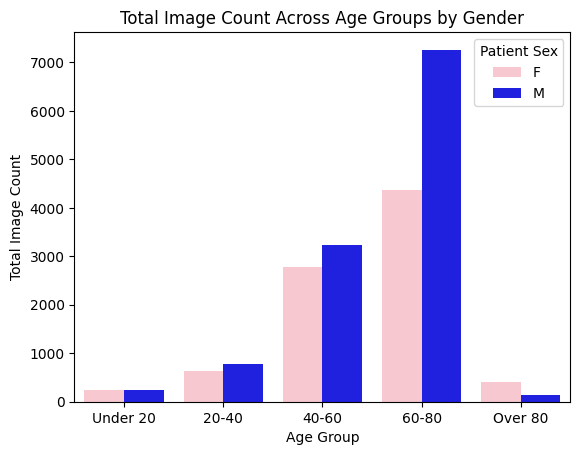

In [32]:
# Aggregate the data
image_counts = new_df.groupby(['age_group', 'Patient Sex'])['Image Count'].sum().reset_index()

# Plot
sns.barplot(x='age_group', y='Image Count', hue='Patient Sex', data=image_counts, palette=color_palette)
plt.title('Total Image Count Across Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Image Count')
plt.legend(title='Patient Sex')
plt.show()

## Intersection groups for age goup + gender

In [33]:
# Assuming 'Age Group' and 'Patient Sex' are already defined in your DataFrame df
new_df['group_age_gender'] = new_df['age_group'].astype(str) + ' - ' + new_df['Patient Sex']

### Diagnosis distribution by intersectional age group and gender

### Patient level

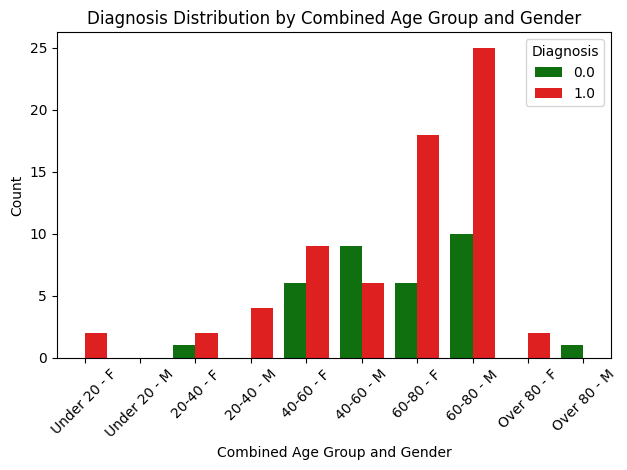

In [34]:
# Define the order manually
order = [
    'Under 20 - F', 'Under 20 - M', 
    '20-40 - F', '20-40 - M', 
    '40-60 - F', '40-60 - M', 
    '60-80 - F', '60-80 - M', 
    'Over 80 - F', 'Over 80 - M'
]

diagnosis_palette = {0.0: "green", 1.0:"red"}

sns.countplot(x='group_age_gender', hue='binary_diagnosis_patient', data=new_df, palette=diagnosis_palette, order=order)
plt.title('Diagnosis Distribution by Combined Age Group and Gender')
plt.xlabel('Combined Age Group and Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title='Diagnosis')
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

### Image count level

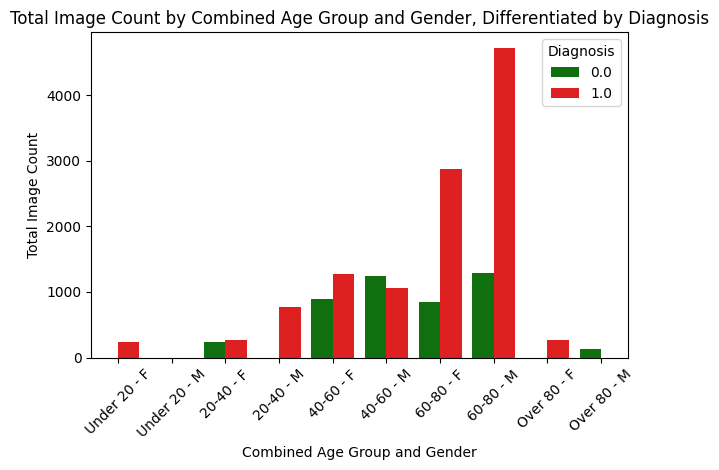

In [35]:
# Aggregate the data
image_counts = new_df.groupby(['group_age_gender', 'binary_diagnosis_patient'])['Image Count'].sum().reset_index()

# Plot
sns.barplot(x='group_age_gender', y='Image Count', hue='binary_diagnosis_patient', data=image_counts,
            palette=diagnosis_palette, order=order)
plt.title('Total Image Count by Combined Age Group and Gender, Differentiated by Diagnosis')
plt.xlabel('Combined Age Group and Gender')
plt.ylabel('Total Image Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title='Diagnosis')
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()


# Other Metadata

## Nodule Counts

In [36]:
path = '/Volumes/MIREIA/M-THESIS/DATA/lidc-idri-nodule-counts-6-23-2015.xlsx'
df_nodule_count = pd.read_excel(path)
df_nodule_count.head()

,TCIA Patent ID,Total Number of Nodules*,Number of Nodules >=3mm**,Number of Nodules <3mm***,Unnamed: 4,Unnamed: 5
0,LIDC-IDRI-0001,4,1,3,NaN,NaN
1,LIDC-IDRI-0002,12,1,11,NaN,*total number of lesions that received either ...
2,LIDC-IDRI-0003,4,4,0,NaN,"**total number of lesions that received a ""nod..."
3,LIDC-IDRI-0004,4,1,3,NaN,"***total number of lesions that received a ""no..."
4,LIDC-IDRI-0005,9,3,6,NaN,NaN


# Patient's CT XML file (contains same metadata for the patient)

In [37]:
# should use package pylidc for assistance using the XML data (contains methods for querying the data)